In [6]:
!pip install yfinance
!pip install ta
!pip install mpl_finance

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import ta
import warnings
warnings.filterwarnings("ignore")
from matplotlib import cycler

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')


# Importar dades

In [13]:
df = yf.download("GOOG")
df.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
df = df[["Adj Close"]]

In [19]:
df.columns = ["close"]
df

,close
Date,
2004-08-19,2.496292
2004-08-20,2.694573
2004-08-23,2.721690
2004-08-24,2.608991
2004-08-25,2.637103
...,...
2024-08-29,163.399994
2024-08-30,165.110001
2024-09-03,158.610001


# Creem una SMA

In [49]:
df["SMA 15"] = df[["close"]].rolling(15).mean().shift(1)
df["SMA 60"] = df[["close"]].rolling(60).mean().shift(1)

In [51]:
df.head(20)

,close,SMA 15,SMA 60,returns
Date,,,,
2004-08-19,2.496292,NaN,NaN,NaN
2004-08-20,2.694573,NaN,NaN,0.079430
2004-08-23,2.721690,NaN,NaN,0.010064
2004-08-24,2.608991,NaN,NaN,-0.041408
2004-08-25,2.637103,NaN,NaN,0.010775
2004-08-26,2.684621,NaN,NaN,0.018019
2004-08-27,2.640835,NaN,NaN,-0.016310
2004-08-30,2.537839,NaN,NaN,-0.039001
2004-08-31,2.546795,NaN,NaN,0.003529


<Axes: xlabel='Date'>

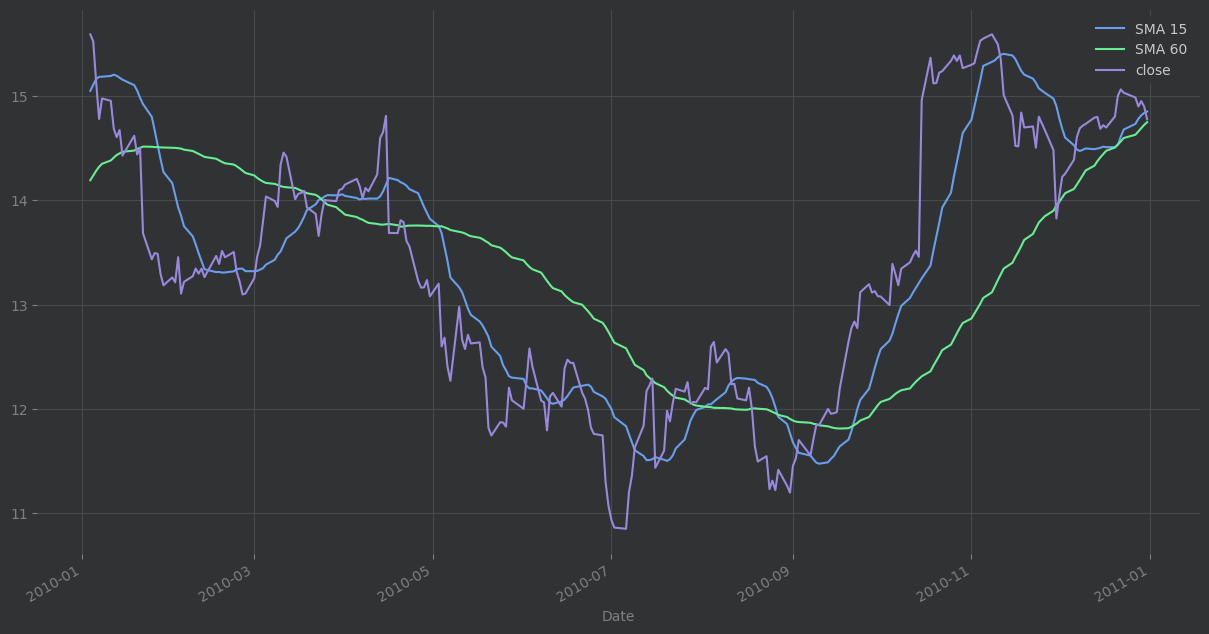

In [53]:
df[["SMA 15", "SMA 60", "close"]].loc["2010"].plot(figsize=(15,8))

# Creem Desviació standard mòvil (MSD)

<Axes: xlabel='Date'>

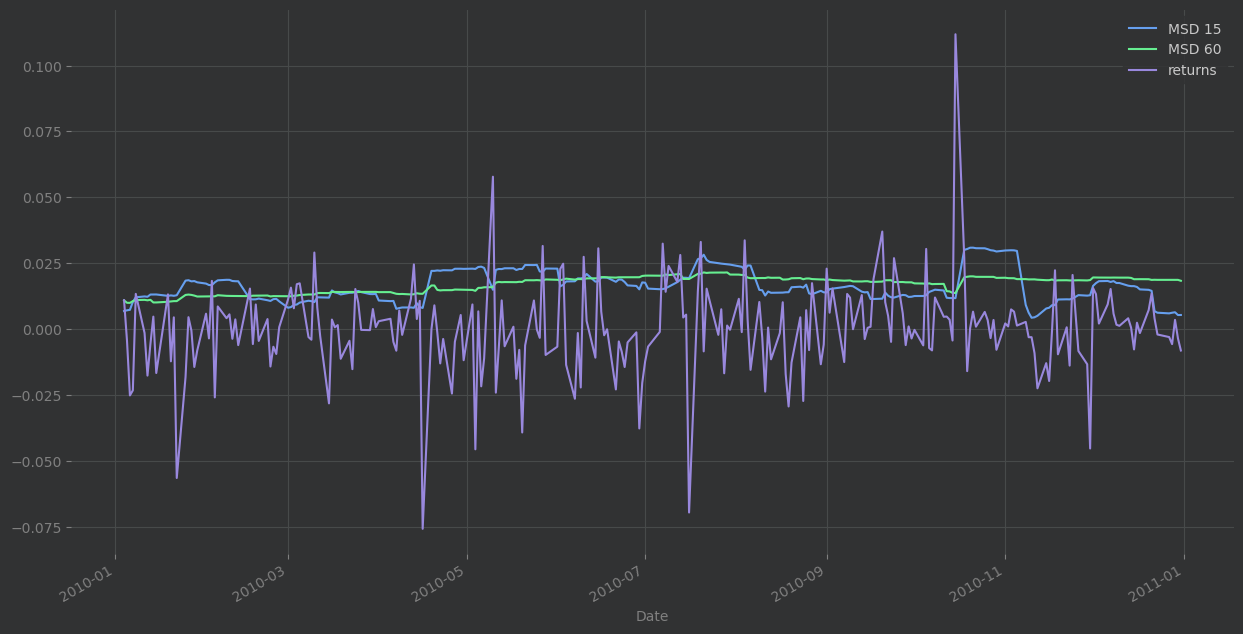

In [61]:
# volatilitat del retorn
df["returns"] = df["close"].pct_change(1)
df["MSD 15"] = df[["returns"]].rolling(15).std().shift(1)
df["MSD 60"] = df[["returns"]].rolling(60).std().shift(1)

df[["MSD 15", "MSD 60", "returns"]].loc["2010"].plot(figsize=(15,8))

# Llibreria Technical Analysis (ta ) per fer RSI

In [64]:
import ta
RSI = ta.momentum.RSIIndicator(df["close"], window=14, fillna=False)
RSI

In [66]:
df["rsi"] = RSI.rsi()

<Axes: xlabel='Date'>

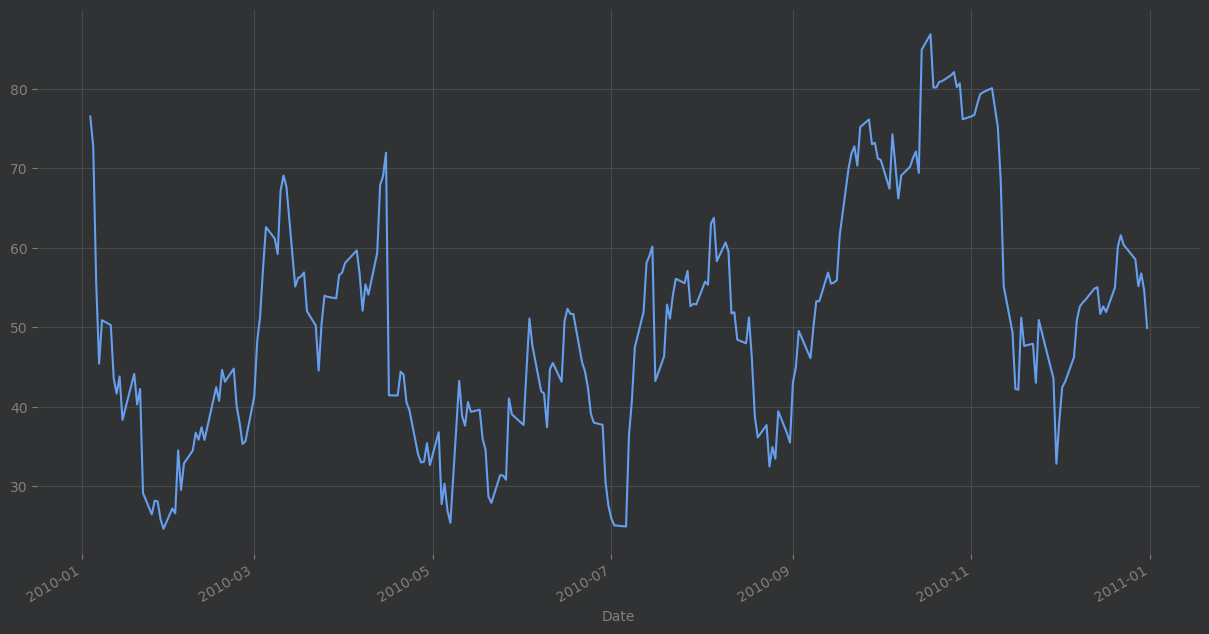

In [68]:
df["rsi"].loc["2010"].plot(figsize=(15,8))

# Automatitzem el procés

In [73]:
def feature_engineering(df):
    df_copy = df.copy()
    df_copy["returns"] = df_copy["close"].pct_change(1)
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window=14, fillna=False)
    df_copy["rsi"] = RSI.rsi()
    return df_copy


In [75]:
df = yf.download("GOOG")
df = df[["Adj Close"]]
df.columns = ["close"]


[*********************100%***********************]  1 of 1 completed


In [77]:
df

,close
Date,
2004-08-19,2.496292
2004-08-20,2.694573
2004-08-23,2.721690
2004-08-24,2.608991
2004-08-25,2.637103
...,...
2024-08-29,163.399994
2024-08-30,165.110001
2024-09-03,158.610001


In [79]:
feature_engineering(df)

,close,returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
Date,,,,,,,
2004-08-19,2.496292,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.694573,0.079430,NaN,NaN,NaN,NaN,NaN
2004-08-23,2.721690,0.010064,NaN,NaN,NaN,NaN,NaN
2004-08-24,2.608991,-0.041408,NaN,NaN,NaN,NaN,NaN
2004-08-25,2.637103,0.010775,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-08-29,163.399994,-0.006687,165.717999,175.788116,0.011576,0.017982,40.070400
2024-08-30,165.110001,0.010465,165.688666,175.595933,0.011670,0.017763,43.913122
2024-09-03,158.610001,-0.039368,165.669999,175.399954,0.011748,0.017918,34.783196
